In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import os
%matplotlib inline
os.chdir('/Users/Wizard/GitHub/Myprojects/')
os.getcwd()

'/Users/Wizard/GitHub/Myprojects'

In [28]:
#load files
df1 = pd.read_csv('Big Mart/Data/train.csv')
df2 = pd.read_csv('Big Mart/Data/test.csv')
df = pd.DataFrame(df1, copy =True)
tf = pd.DataFrame(df2, copy =True)
test = [df,tf]

In [29]:
#descriptive statistics
print df.shape
print '\n%s\n' %df.dtypes
print df.head()
print '\ndescribe\n'
print df.describe()

(8523, 12)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1       

In [30]:
#dfcolumns
print df.columns
#unique and nulls
print df.apply(lambda x: len(x.unique()))
print '\nNull values count\n'
print df.isnull().sum()

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales'],
      dtype='object')
Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Null values count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
O

In [31]:
for i in test:
    i.loc[i['Item_Weight'].isnull(), 'Item_Weight'] = round(i['Item_Weight'].mean(),0)
    i['Item_Weight'].isnull().sum()
    i['Item_Weight'].mean()

In [32]:
print 'sum of individual unique values in a selected column'

for i in df[['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size']]:
    print '\n %s'%i
    print df[i].value_counts()

sum of individual unique values in a selected column

 Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

 Outlet_Size
Medium    2793
S

In [33]:
from scipy.stats import mode
for i in test:
    a = i.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))    
    i.loc[i['Outlet_Size'].isnull(), 'Outlet_Size']= i.loc[i['Outlet_Size'].isnull(),'Outlet_Type'].apply(lambda x:a[x])

In [34]:
#print df.isnull().sum()
print df.describe()
print '\n ----- \n'
print df.head()

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.882081         0.066132   140.992782                1997.831867   
std       4.226465         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      13.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  

 ----- 

  Item_Identifier  Item_Weight Item

In [35]:
#Feature engineering
#1 Modify Item_Visibility
for i in test:
    i.loc[i['Item_Visibility']==0, 'Item_Visibility'] = i['Item_Visibility'].mean()

In [36]:
# 2. Food types
for i in test:
    i['Item_Type_New'] = i['Item_Identifier'].apply(lambda x:x[0:2])
    i['Item_Type_New'] = i['Item_Type_New'].map({'DR':'Drinks', 'FD':'Food', 'NC':'Non-consummables'})
    #print np.unique(df['Item_Type_New'])

In [37]:
# 3. Fat items 
for i in test:
    np.unique(i.Item_Fat_Content)
    i.Item_Fat_Content = i.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
    i.loc[i['Item_Type_New']=='Non-consummables', 'Item_Fat_Content'] = 'Non-edible'

In [38]:
#store operating year
for i in test:
    i['Outlet_Operating_Year'] = 2013-i['Outlet_Establishment_Year']

In [39]:
#Step 5: Numerical and One-Hot Coding of Categorical variables
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in test:
    i['Outlet'] = i['Outlet_Identifier']
    col = [u'Item_Fat_Content', u'Outlet_Size', u'Outlet_Location_Type',u'Outlet_Type',u'Item_Type_New', u'Outlet']
    for j in col:
        i[j]=le.fit_transform(i[j])

In [40]:
#One Hot Coding:
col = [u'Item_Fat_Content', u'Outlet_Size', u'Outlet_Location_Type',u'Outlet_Type', u'Item_Type_New',u'Outlet']
df = pd.get_dummies(df, columns = col)
tf = pd.get_dummies(tf, columns = col)

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Operating_Year,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987,994.7052,26,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['Outlet_Establishment_Year','Item_Type'],axis=1, inplace =True)
tf.drop(['Outlet_Establishment_Year','Item_Type'],axis=1, inplace =True)

In [45]:
print df.shape
print df.dtypes

(8523, 33)
Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Operating_Year       int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_New_0             uint8
Item_Type_New_1             uint8
Item_Type_New_2             uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Out

In [46]:
print tf.shape
print df.dtypes

(5681, 32)
Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Operating_Year       int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_New_0             uint8
Item_Type_New_1             uint8
Item_Type_New_2             uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Out

In [48]:
#Export files as modified versions:
df.to_csv("train_modified.csv",index=False)
tf.to_csv("test_modified.csv",index=False)

In [54]:
#Model building
#mean model - base model
forecast_sales = df['Item_Outlet_Sales'].mean()
forecast_sales
#create a df for submission
base1 = tf[['Item_Identifier','Outlet_Identifier']]
base1['forecast_sales'] = forecast_sales
base1.head()

/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Item_Identifier,Outlet_Identifier,forecast_sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [57]:
df.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Operating_Year       int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_New_0             uint8
Item_Type_New_1             uint8
Item_Type_New_2             uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6      

In [79]:
#create target, id, 
target = 'Item_Outlet_Sales'
Id = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics
def modelfit(alg, train, test, predictor, target, Id):
    alg.fit(train[predictor], train[target])
    #training predictions
    train_predictions = alg.predict(train[predictor])
    #test predictions
    test_predictions = alg.predict(test[predictor])
    #validationscore 
    cv_score = cross_validation.cross_val_score(alg, train[predictor], train[target], 
                                                       cv=10,scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print "\nModel Report"
    print "RMSE %4f" %np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions))
    print "cv score mean - %4f|std - %4f| min - %4f| max - %4f" %(np.mean(cv_score),np.std(cv_score),
                                                                np.min(cv_score),np.max(cv_score))

In [80]:
from sklearn.linear_model import LinearRegression
predictor = [x for x in df.columns if x not in [target]+Id]

In [82]:
LR = LinearRegression(normalize = True) 
modelfit(LR, df, tf, predictor, target, Id)


Model Report
RMSE 1127.419334
cv score mean - 1129.779911|std - 16.720784| min - 1108.222670| max - 1163.684334


/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was rename

/Users/Wizard/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


[]


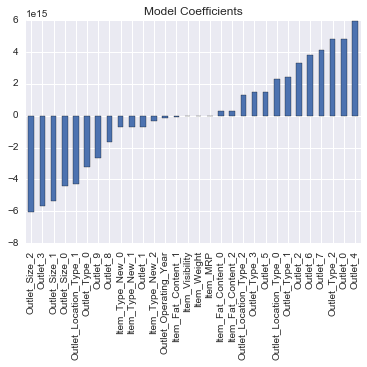

In [99]:
pd.Series(LR.coef_, predictor).sort_values().plot(kind = 'bar', title='Model Coefficients')


In [102]:
print LR.intercept_

5.92450696644e+15


In [105]:
print LR.predict(df[predictor])
print df['Item_Outlet_Sales']

[ 4049.   572.  2363. ...,  1511.  1413.  1221.]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
5        556.6088
6        343.5528
7       4022.7636
8       1076.5986
9       4710.5350
10      1516.0266
11      2187.1530
12      1589.2646
13      2145.2076
14      1977.4260
15      1547.3192
16      1621.8888
17       718.3982
18      2303.6680
19      2748.4224
20      3775.0860
21      4064.0432
22      1587.2672
23       214.3876
24      4078.0250
25       838.9080
26      1065.2800
27       308.9312
28       178.4344
29       125.8362
          ...    
8493    4727.1800
8494    1637.8680
8495    4314.3840
8496    3715.1640
8497    2247.0750
8498    1601.2490
8499    2976.1260
8500    1907.5170
8501    1508.0370
8502    3020.0688
8503    3392.9168
8504    4138.6128
8505    2117.2440
8506    3944.8650
8507     515.9950
8508    2587.9646
8509     424.7804
8510    7182.6504
8511    4207.8560
8512    2479.4392
8513     595.2252
8514     468.72